# BOOK RECOMMENDATION MODEL

### "I employed a variety of distance metrics and similarity measures, including Euclidean distance, cosine similarity, cityblock distance, Canberra distance, and Jaccard similarity, to analyze the similarity between user preferences and generate recommendations in my recommendation model."

### "I conducted a survey where users were asked to rate 50 books on a scale of 1 to 5 based on whether they had read them. Additionally, users were provided with the option to mark 'Not read' for books they hadn't yet read. I utilized the responses from this survey as inputs in my recommendation model, enabling me to understand user preferences and generate personalized book recommendations."



#### survey - https://docs.google.com/forms/d/e/1FAIpQLScdSHq-IyAR6muKUyYmzlZJ5HztuSE8_zBr3mgxHixJSIpA0w/viewform?usp=sf_link

In [365]:
# Import libraries

import pandas as pd
pd.set_option('display.max_rows', None)
import pylab as plt
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.spatial.distance import pdist       

from scipy.spatial.distance import squareform 


In [366]:
# Load data

survey = pd.read_csv('Valoración de libros - Respuestas de formulario.csv')
survey.head()

,Marca temporal,Name,"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]","Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]",Pride and Prejudice - Jane Austen [Book 3],To Kill a Mockingbird - Harper Lee [Book 4],The Book Thief - Markus Zusak [Book 5],"Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]",Animal Farm - George Orwell [Book 7],J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8],...,A Thousand Splendid Suns - Khaled Hosseini [Book 41],The Time Traveler’s Wife - Audrey Niffenegger [Book 42],The Princess Bride - William Goldman [Book 43],The Secret Garden - Frances Hodgson Burnett [Book 44],"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",The Outsiders - S.E. Hinton [Book 46],Little Women - Louisa May Alcott [Book 47],1984 - George Orwell [Book 48],"A Wrinkle in Time (Time Quintet, #1) - Madeleine L'Engle [Book 49]",The Odyssey - Homer [Book 50]
0,2/03/2024 16:30:34,Margarita,Satisfactory,Very good,Satisfactory,Poor,Poor,Poor,Very good,Excellent,...,Very good,Fair,Not read,Poor,Excellent,Poor,Very good,Poor,Not read,Very good
1,2/03/2024 19:33:06,Dayanara,Not read,Excellent,Satisfactory,Not read,Not read,Satisfactory,Not read,Excellent,...,Not read,Not read,Not read,Not read,Not read,Not read,Not read,Not read,Not read,Very good
2,2/03/2024 19:36:43,Marialuisa,Not read,Not read,Not read,Very good,Very good,Not read,Not read,Not read,...,Excellent,Not read,Not read,Not read,Not read,Excellent,Not read,Not read,Not read,Not read
3,2/03/2024 19:41:20,AnneMarie,Excellent,Very good,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,...,Excellent,Excellent,Not read,Not read,Very good,Not read,Excellent,Excellent,Not read,Excellent
4,2/03/2024 19:44:00,Malanga,Excellent,Excellent,Excellent,Satisfactory,Satisfactory,Poor,Not read,Satisfactory,...,Satisfactory,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very good,Satisfactory,Satisfactory


In [367]:
survey.isnull().sum()

Marca temporal                                                                                           0
Name                                                                                                     0
The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]                                       0
Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]                     0
Pride and Prejudice - Jane Austen [Book 3]                                                               0
To Kill a Mockingbird - Harper Lee [Book 4]                                                              0
The Book Thief - Markus Zusak [Book 5]                                                                   0
Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]                                              0
Animal Farm - George Orwell [Book 7]                                                                     0
J.R.R. Tolkien 4-Book Boxed Set: The 

In [368]:
# Drop 'Marca temporal' column as we don't need it

survey.drop('Marca temporal', axis=1, inplace=True)

In [369]:
survey.columns

Index(['Name',
       'The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]',
       'Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]',
       'Pride and Prejudice - Jane Austen [Book 3]',
       'To Kill a Mockingbird - Harper Lee [Book 4]',
       'The Book Thief - Markus Zusak [Book 5]',
       'Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]',
       'Animal Farm - George Orwell [Book 7]',
       'J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8]',
       'The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]',
       'The Fault in Our Stars - John Green [Book 10]',
       'The Picture of Dorian Gray - Oscar Wilde [Book 11]',
       'The Giving Tree - Shel Silverstein [Book 12]',
       'Gone with the Wind - Margaret Mitchell [Book 13]',
       'Wuthering Heights - Emily Brontë [Book 14]',
       'The Perks of Being a Wallflower - Stephen Chbosky [B

In [370]:
# Transpose the DataFrame

survey = survey.transpose()

# Set the first row as column headers
survey.columns = survey.iloc[0]

# Drop the first row (since it's now the column headers)
survey = survey.drop(survey.index[0])

In [371]:
survey.index.name = 'Books'
survey.columns.name = None

In [372]:
survey

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Puci,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna
Books,,,,,,,,,,,,,,,,,,,,,
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",Satisfactory,Not read,Not read,Excellent,Excellent,Poor,Excellent,Satisfactory,Satisfactory,Satisfactory,...,Fair,Very good,Satisfactory,Satisfactory,Not read,Excellent,Not read,Very good,Not read,Very good
"Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]",Very good,Excellent,Not read,Very good,Excellent,Poor,Poor,Not read,Satisfactory,Not read,...,Excellent,Fair,Satisfactory,Satisfactory,Not read,Very good,Not read,Very good,Very good,Very good
Pride and Prejudice - Jane Austen [Book 3],Satisfactory,Satisfactory,Not read,Excellent,Excellent,Fair,Excellent,Very good,Not read,Not read,...,Very good,Excellent,Satisfactory,Fair,Very good,Excellent,Fair,Excellent,Excellent,Excellent
To Kill a Mockingbird - Harper Lee [Book 4],Poor,Not read,Very good,Excellent,Satisfactory,Satisfactory,Excellent,Not read,Not read,Not read,...,Very good,Not read,Poor,Fair,Very good,Not read,Fair,Not read,Not read,Excellent
The Book Thief - Markus Zusak [Book 5],Poor,Not read,Very good,Excellent,Satisfactory,Fair,Excellent,Satisfactory,Not read,Not read,...,Very good,Not read,Satisfactory,Fair,Not read,Not read,Very good,Not read,Not read,Excellent
"Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]",Poor,Satisfactory,Not read,Excellent,Poor,Satisfactory,Excellent,Excellent,Poor,Fair,...,Excellent,Fair,Fair,Satisfactory,Not read,Excellent,Not read,Fair,Not read,Very good
Animal Farm - George Orwell [Book 7],Very good,Not read,Not read,Excellent,Not read,Fair,Poor,Satisfactory,Not read,Excellent,...,Excellent,Not read,Fair,Fair,Very good,Not read,Satisfactory,Excellent,Very good,Excellent
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8],Excellent,Excellent,Not read,Very good,Satisfactory,Very good,Excellent,Very good,Not read,Excellent,...,Very good,Not read,Satisfactory,Fair,Not read,Not read,Satisfactory,Excellent,Not read,Not read
"The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]",Satisfactory,Excellent,Not read,Excellent,Satisfactory,Excellent,Excellent,Satisfactory,Not read,Satisfactory,...,Very good,Not read,Satisfactory,Poor,Not read,Fair,Not read,Not read,Satisfactory,Not read


In [394]:
# Replace the ratings with numerical values

ratings = {
    'Not read': 0,
    'Poor': 1,
    'Fair': 2,
    'Satisfactory': 3,
    'Very good': 4,
    'Excellent': 5
}

# Apply the mapping to all columns in the DataFrame
survey.replace(ratings, inplace=True)

In [396]:
# Function to Visualize Ratings of Two Books by Users

def plot(b1, b2):
    x = survey.T[b1]   # Rate of the first book
    y = survey.T[b2]   # Rate of the second book
    
    n = list(survey.columns)  # List of user names
    
    plt.figure(figsize=(18, 12))
    
    plt.scatter(x, y, s=0)   # Empty scatter plot
    
    plt.title('{} VS. {}'.format(b1, b2), fontsize=14)
    plt.xlabel(b1, fontsize=14)
    plt.ylabel(b2, fontsize=14)
    
    for i, e in enumerate(n):
        plt.annotate(e, (x[i], y[i]), fontsize=12)
        
    plt.show()


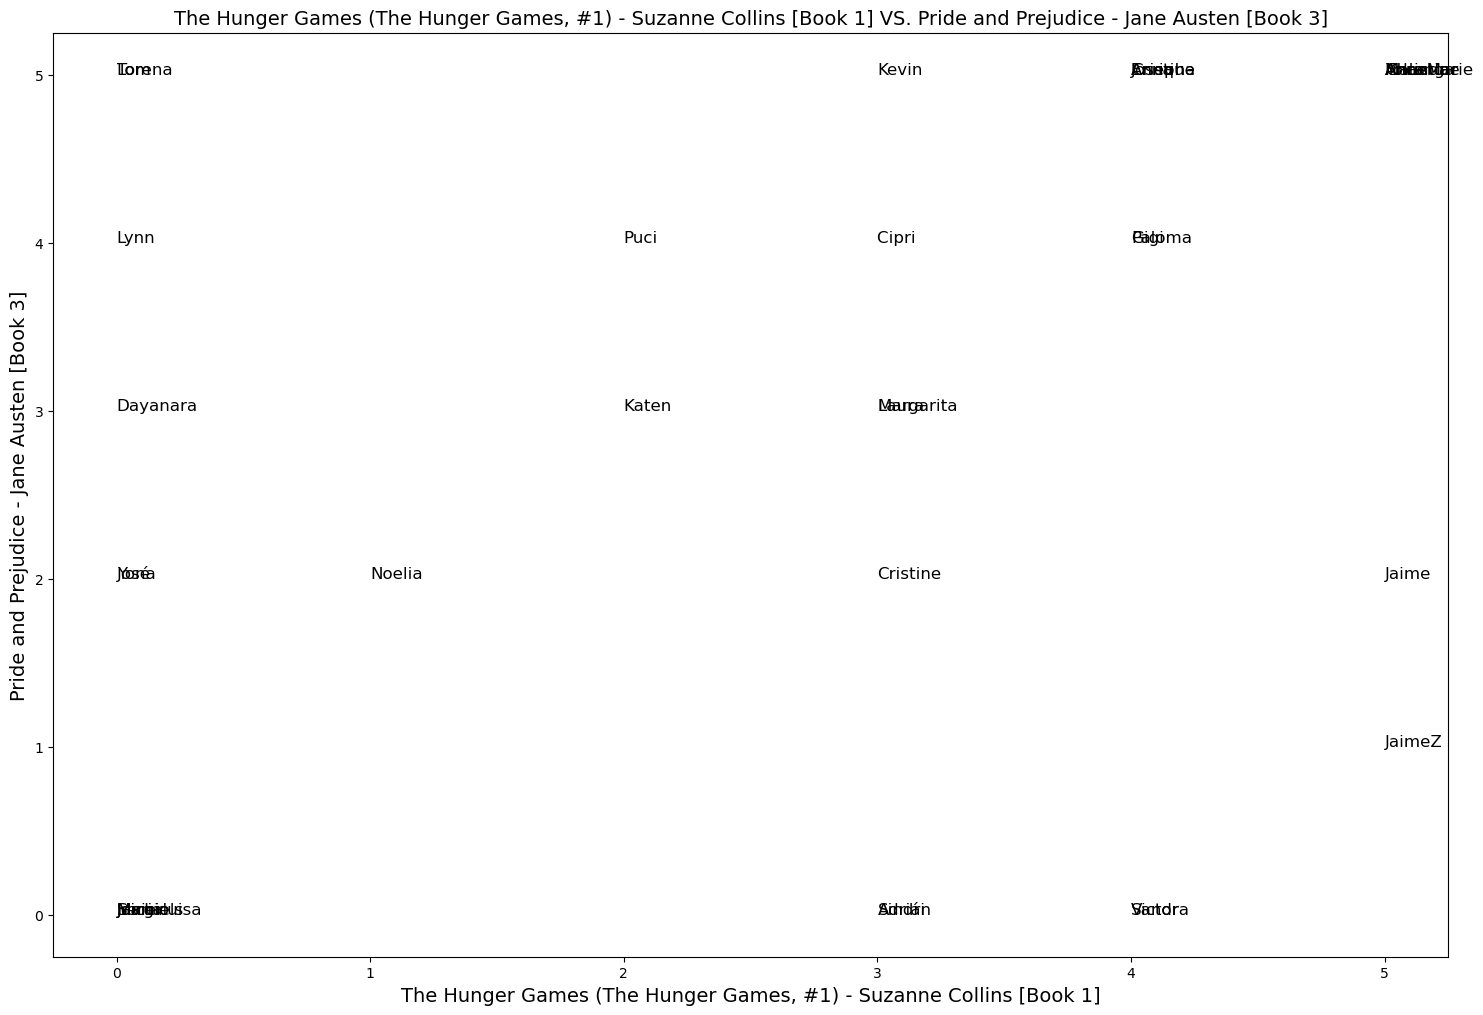

In [397]:
plot('The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]', 'Pride and Prejudice - Jane Austen [Book 3]')

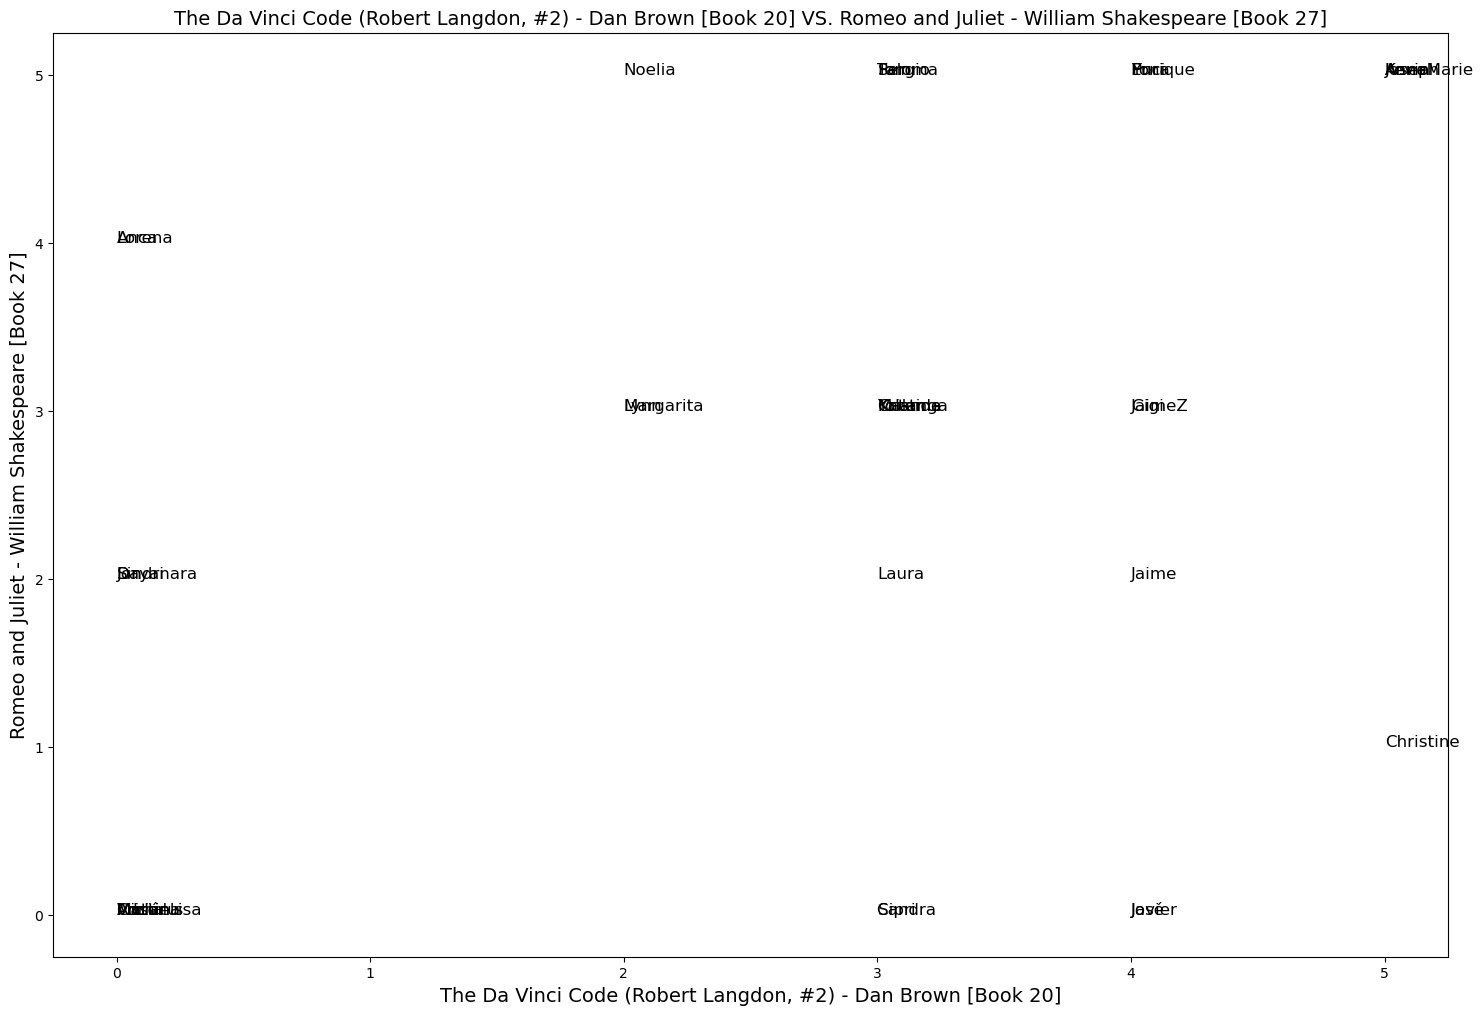

In [398]:
plot('The Da Vinci Code (Robert Langdon, #2) - Dan Brown [Book 20]', 'Romeo and Juliet - William Shakespeare [Book 27]')

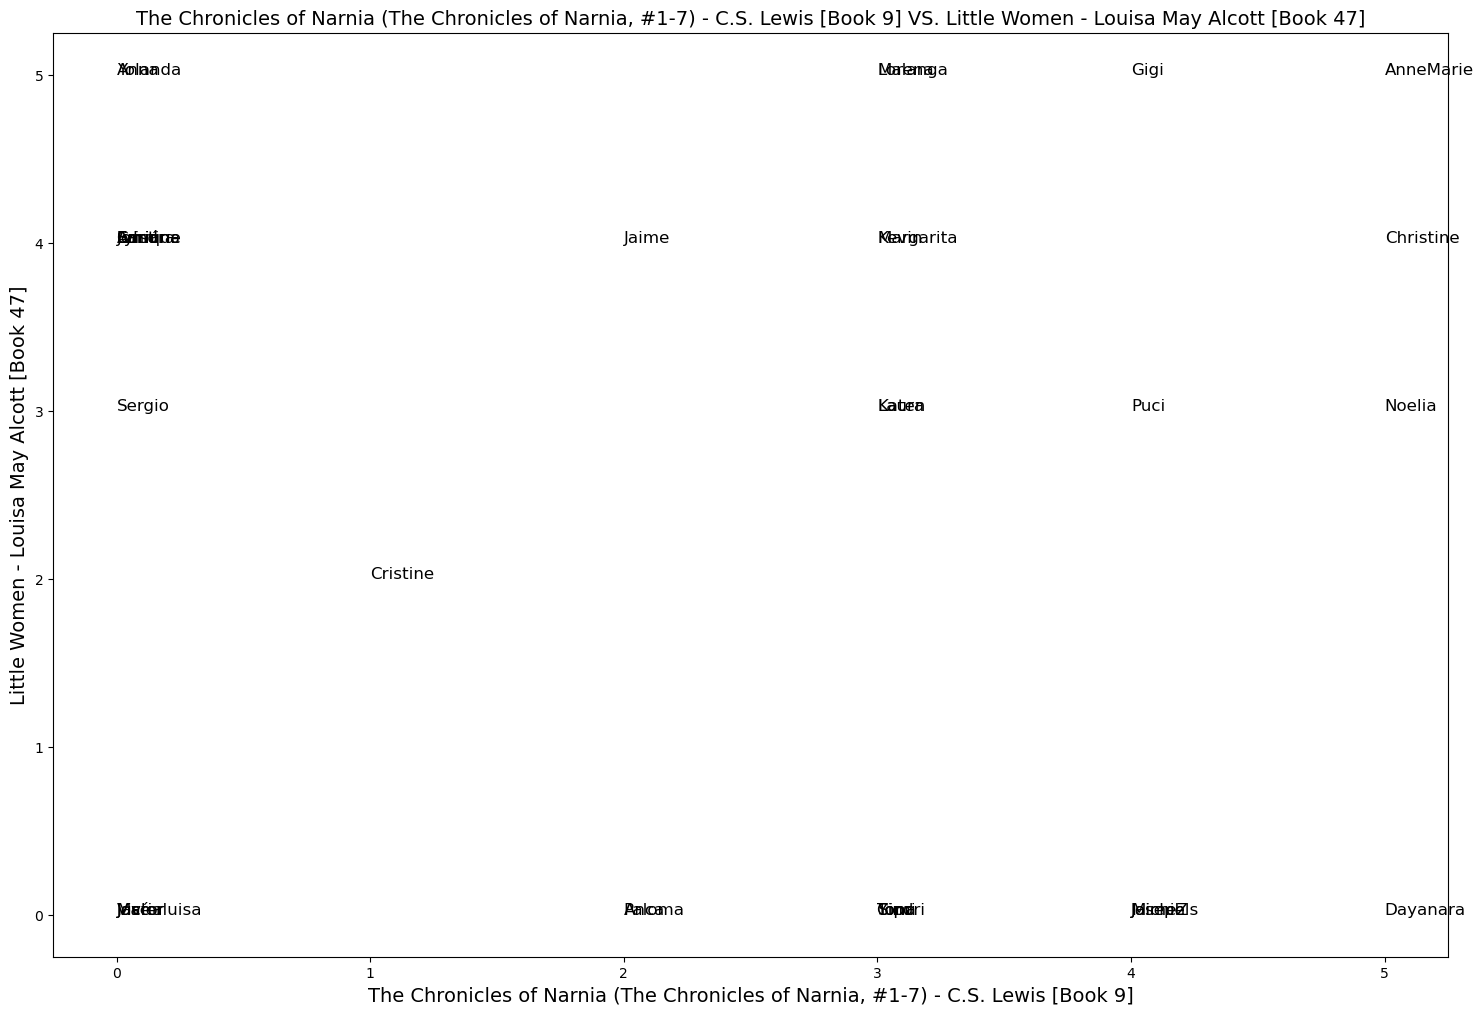

In [399]:
plot('The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]', 'Little Women - Louisa May Alcott [Book 47]')

In [400]:
survey.T

Books,"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]","Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]",Pride and Prejudice - Jane Austen [Book 3],To Kill a Mockingbird - Harper Lee [Book 4],The Book Thief - Markus Zusak [Book 5],"Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]",Animal Farm - George Orwell [Book 7],J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8],"The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]",The Fault in Our Stars - John Green [Book 10],...,A Thousand Splendid Suns - Khaled Hosseini [Book 41],The Time Traveler’s Wife - Audrey Niffenegger [Book 42],The Princess Bride - William Goldman [Book 43],The Secret Garden - Frances Hodgson Burnett [Book 44],"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",The Outsiders - S.E. Hinton [Book 46],Little Women - Louisa May Alcott [Book 47],1984 - George Orwell [Book 48],"A Wrinkle in Time (Time Quintet, #1) - Madeleine L'Engle [Book 49]",The Odyssey - Homer [Book 50]
Margarita,3,4,3,1,1,1,4,5,3,5,...,4,2,0,1,5,1,4,1,0,4
Dayanara,0,5,3,0,0,3,0,5,5,0,...,0,0,0,0,0,0,0,0,0,4
Marialuisa,0,0,0,4,4,0,0,0,0,0,...,5,0,0,0,0,5,0,0,0,0
AnneMarie,5,4,5,5,5,5,5,4,5,5,...,5,5,0,0,4,0,5,5,0,5
Malanga,5,5,5,3,3,1,0,3,3,3,...,3,5,5,5,5,5,5,4,3,3
Noelia,1,1,2,3,2,3,2,4,5,1,...,3,2,3,3,3,5,3,5,5,2
Christine,5,1,5,5,5,5,1,5,5,1,...,1,1,1,4,5,1,4,1,1,1
Cipri,3,0,4,0,3,5,3,4,3,0,...,3,4,3,3,5,0,0,0,0,4
Adrián,3,3,0,0,0,1,0,0,0,0,...,0,0,0,0,5,0,4,0,0,0
Sindri,3,0,0,0,0,2,5,5,3,0,...,0,0,0,4,5,0,0,5,0,3


In [401]:
# Calculate Pairwise Distances between users based on their survey responses.

distances = squareform(pdist(survey.T, 'euclidean'))  # distancia

distances  

array([[ 0.        , 18.62793601, 22.91287847, ..., 19.05255888,
        18.84144368, 22.04540769],
       [18.62793601,  0.        , 19.23538406, ..., 17.32050808,
        25.61249695, 20.90454496],
       [22.91287847, 19.23538406,  0.        , ..., 19.6977156 ,
        26.72077843, 22.95648057],
       ...,
       [19.05255888, 17.32050808, 19.6977156 , ...,  0.        ,
        24.69817807, 23.51595203],
       [18.84144368, 25.61249695, 26.72077843, ..., 24.69817807,
         0.        , 22.47220505],
       [22.04540769, 20.90454496, 22.95648057, ..., 23.51595203,
        22.47220505,  0.        ]])

In [402]:
similitude = 1/(1+distances)

similitude 

array([[1.        , 0.05094779, 0.04181847, ..., 0.04986895, 0.05039956,
        0.04339259],
       [0.05094779, 1.        , 0.04941838, ..., 0.05458364, 0.03757633,
        0.04565263],
       [0.04181847, 0.04941838, 1.        , ..., 0.04831451, 0.03607402,
        0.04174236],
       ...,
       [0.04986895, 0.05458364, 0.04831451, ..., 1.        , 0.03891326,
        0.04078977],
       [0.05039956, 0.03757633, 0.03607402, ..., 0.03891326, 1.        ,
        0.04260358],
       [0.04339259, 0.04565263, 0.04174236, ..., 0.04078977, 0.04260358,
        1.        ]])

In [403]:
pd.DataFrame(similitude, columns=survey.columns, index=survey.columns)

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Tom
Margarita,1.000000,0.050948,0.041818,0.050066,0.058932,0.057267,0.052251,0.058824,0.049229,0.054412,...,0.049229,0.074350,0.073054,0.049804,0.047338,0.044688,0.048735,0.049869,0.050400,0.043393
Dayanara,0.050948,1.000000,0.049418,0.037223,0.040406,0.045603,0.048315,0.049610,0.050740,0.048980,...,0.056391,0.060167,0.059041,0.046057,0.053100,0.054756,0.045114,0.054584,0.037576,0.045653
Marialuisa,0.041818,0.049418,1.000000,0.035527,0.038025,0.043738,0.049674,0.043870,0.052942,0.046057,...,0.050603,0.053744,0.058185,0.048255,0.051587,0.066986,0.039477,0.048315,0.036074,0.041742
AnneMarie,0.050066,0.037223,0.035527,1.000000,0.049229,0.048374,0.048614,0.044641,0.037549,0.040202,...,0.039255,0.053499,0.053992,0.044003,0.040441,0.040100,0.047676,0.039255,0.069187,0.039606
Malanga,0.058932,0.040406,0.038025,0.049229,1.000000,0.058824,0.051443,0.052101,0.041554,0.042766,...,0.039736,0.070468,0.067640,0.049739,0.040338,0.040754,0.043738,0.041629,0.053909,0.045066
Noelia,0.057267,0.045603,0.043738,0.048374,0.058824,1.000000,0.055107,0.057467,0.044923,0.054159,...,0.045114,0.069727,0.078977,0.056873,0.047733,0.047506,0.049418,0.047283,0.047619,0.059151
Christine,0.052251,0.048315,0.049674,0.048614,0.051443,0.055107,1.000000,0.059822,0.054756,0.054327,...,0.051158,0.077421,0.074129,0.050400,0.054075,0.057367,0.050199,0.047963,0.044734,0.050671
Cipri,0.058824,0.049610,0.043870,0.044641,0.052101,0.057467,0.059822,1.000000,0.048857,0.057568,...,0.050400,0.070280,0.073054,0.048674,0.049869,0.052402,0.043350,0.046899,0.044410,0.049804
Adrián,0.049229,0.050740,0.052942,0.037549,0.041554,0.044923,0.054756,0.048857,1.000000,0.052555,...,0.069010,0.063432,0.063162,0.046472,0.061859,0.054584,0.049042,0.057772,0.037250,0.041004
Sindri,0.054412,0.048980,0.046057,0.040202,0.042766,0.054159,0.054327,0.057568,0.052555,1.000000,...,0.049739,0.060755,0.065283,0.048918,0.055738,0.052864,0.045259,0.050671,0.041076,0.046525


In [404]:
# Add a new user so we can recommend him books


Tom = {'The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]': 0, 
      'Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]':3, 
      'Pride and Prejudice - Jane Austen [Book 3]':5,
      'To Kill a Mockingbird - Harper Lee [Book 4]':0, 
      'The Book Thief - Markus Zusak [Book 5]':5,
      'Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]':5, 
      'Animal Farm - George Orwell [Book 7]':5,
      'J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8]':4, 
      'The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]':3,
      'The Fault in Our Stars - John Green [Book 10]':0,
      'The Picture of Dorian Gray - Oscar Wilde [Book 11]':0,
      'The Giving Tree - Shel Silverstein [Book 12]':0,
      'Gone with the Wind - Margaret Mitchell [Book 13]':4,
      'Wuthering Heights - Emily Brontë [Book 14]':3,
      'The Perks of Being a Wallflower - Stephen Chbosky [Book 15]':0,
      'Jane Eyre - Charlotte Brontë [Book 16]':3,
      'The Lightning Thief (Percy Jackson and the Olympians, #1) - Rick Riordan [Book 17]':0,
      'The Great Gatsby - F. Scott Fitzgerald [Book 18]':3,
      'The Little Prince - Antoine de Saint-Exupéry [Book 19]':4,
      'The Da Vinci Code (Robert Langdon, #2) - Dan Brown [Book 20]':3,
      'Alice’s Adventures in Wonderland / Through the Looking-Glass - Lewis Carroll [Book 21]':5,
      'Crime and Punishment - Fyodor Dostoevsky [Book 22]':0,
      'Memoirs of a Geisha - Arthur Golden [Book 23]':0,
      'Divergent (Divergent, #1) - Veronica Roth [Book 24]':3,
      'Les Misérables - Victor Hugo [Book 25]':4,
      'Lord of the Flies - William Golding [Book 26]':5,
      'Romeo and Juliet - William Shakespeare [Book 27]':5,
      'Anne of Green Gables (Anne of Green Gables, #1) - L.M. Montgomery [Book 28]':0,
      'City of Bones (The Mortal Instruments, #1) - Cassandra Clare [Book 29]':0,
      "The Hitchhiker’s Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1) - Douglas Adams [Book 30]":5,
      'The Help - Kathryn Stockett [Book 31]':3,
      'Dracula - Bram Stoker [Book 32]':4,
      "Ender’s Game (Ender's Saga, #1) - Orson Scott Card [Book 33]":5,
      'Charlotte’s Web - E.B. White [Book 34]':5,
      'Of Mice and Men - John Steinbeck [Book 35]':5,
      'The Alchemist - Paulo Coelho [Book 36]':0,
      'Fahrenheit 451 - Ray Bradbury [Book 37]':0,
      'The Catcher in the Rye - J.D. Salinger [Book 38]':4,
      'Brave New World - Aldous Huxley [Book 39]':0,
      'One Hundred Years of Solitude - Gabriel García Márquez [Book 40]':5,
      'A Thousand Splendid Suns - Khaled Hosseini [Book 41]':0,
      'The Time Traveler’s Wife - Audrey Niffenegger [Book 42]':0,
      'The Princess Bride - William Goldman [Book 43]':5,
      'The Secret Garden - Frances Hodgson Burnett [Book 44]':4,
      'A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]':0,
      'The Outsiders - S.E. Hinton [Book 46]':5,
      'Little Women - Louisa May Alcott [Book 47]':0,
      '1984 - George Orwell [Book 48]':5,
      "A Wrinkle in Time (Time Quintet, #1) - Madeleine L'Engle [Book 49]":0,
      'The Odyssey - Homer [Book 50]':0,
      }

In [405]:
survey['Tom'] = pd.Series(Tom)

survey

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Tom
Books,,,,,,,,,,,,,,,,,,,,,
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",3,0,0,5,5,1,5,3,3,3,...,4,3,3,0,5,0,4,0,4,0
"Harry Potter and the Order of the Phoenix (Harry Potter, #5) - J.K. Rowling [Book 2]",4,5,0,4,5,1,1,0,3,0,...,2,3,3,0,4,0,4,4,4,3
Pride and Prejudice - Jane Austen [Book 3],3,3,0,5,5,2,5,4,0,0,...,5,3,2,4,5,2,5,5,5,5
To Kill a Mockingbird - Harper Lee [Book 4],1,0,4,5,3,3,5,0,0,0,...,0,1,2,4,0,2,0,0,5,0
The Book Thief - Markus Zusak [Book 5],1,0,4,5,3,2,5,3,0,0,...,0,3,2,0,0,4,0,0,5,5
"Twilight (The Twilight Saga, #1) - Stephenie Meyer [Book 6]",1,3,0,5,1,3,5,5,1,2,...,2,2,3,0,5,0,2,0,4,5
Animal Farm - George Orwell [Book 7],4,0,0,5,0,2,1,3,0,5,...,0,2,2,4,0,3,5,4,5,5
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings - J.R.R. Tolkien [Book 8],5,5,0,4,3,4,5,4,0,5,...,0,3,2,0,0,3,5,0,0,4
"The Chronicles of Narnia (The Chronicles of Narnia, #1-7) - C.S. Lewis [Book 9]",3,5,0,5,3,5,5,3,0,3,...,0,3,1,0,2,0,0,3,0,3


In [406]:
distances2 = squareform(pdist(survey.T, 'euclidean')) 

similitude2 = 1/(1+distances2)

similitudes2 = pd.DataFrame(similitude2, columns=survey.columns, index=survey.columns)

similitudes2

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Tom
Margarita,1.000000,0.050948,0.041818,0.050066,0.058932,0.057267,0.052251,0.058824,0.049229,0.054412,...,0.049229,0.074350,0.073054,0.049804,0.047338,0.044688,0.048735,0.049869,0.050400,0.043393
Dayanara,0.050948,1.000000,0.049418,0.037223,0.040406,0.045603,0.048315,0.049610,0.050740,0.048980,...,0.056391,0.060167,0.059041,0.046057,0.053100,0.054756,0.045114,0.054584,0.037576,0.045653
Marialuisa,0.041818,0.049418,1.000000,0.035527,0.038025,0.043738,0.049674,0.043870,0.052942,0.046057,...,0.050603,0.053744,0.058185,0.048255,0.051587,0.066986,0.039477,0.048315,0.036074,0.041742
AnneMarie,0.050066,0.037223,0.035527,1.000000,0.049229,0.048374,0.048614,0.044641,0.037549,0.040202,...,0.039255,0.053499,0.053992,0.044003,0.040441,0.040100,0.047676,0.039255,0.069187,0.039606
Malanga,0.058932,0.040406,0.038025,0.049229,1.000000,0.058824,0.051443,0.052101,0.041554,0.042766,...,0.039736,0.070468,0.067640,0.049739,0.040338,0.040754,0.043738,0.041629,0.053909,0.045066
Noelia,0.057267,0.045603,0.043738,0.048374,0.058824,1.000000,0.055107,0.057467,0.044923,0.054159,...,0.045114,0.069727,0.078977,0.056873,0.047733,0.047506,0.049418,0.047283,0.047619,0.059151
Christine,0.052251,0.048315,0.049674,0.048614,0.051443,0.055107,1.000000,0.059822,0.054756,0.054327,...,0.051158,0.077421,0.074129,0.050400,0.054075,0.057367,0.050199,0.047963,0.044734,0.050671
Cipri,0.058824,0.049610,0.043870,0.044641,0.052101,0.057467,0.059822,1.000000,0.048857,0.057568,...,0.050400,0.070280,0.073054,0.048674,0.049869,0.052402,0.043350,0.046899,0.044410,0.049804
Adrián,0.049229,0.050740,0.052942,0.037549,0.041554,0.044923,0.054756,0.048857,1.000000,0.052555,...,0.069010,0.063432,0.063162,0.046472,0.061859,0.054584,0.049042,0.057772,0.037250,0.041004
Sindri,0.054412,0.048980,0.046057,0.040202,0.042766,0.054159,0.054327,0.057568,0.052555,1.000000,...,0.049739,0.060755,0.065283,0.048918,0.055738,0.052864,0.045259,0.050671,0.041076,0.046525


In [407]:
# Books that Tom didn't read

new_survey = survey[survey['Tom'] == 0].copy()
new_survey.drop('Tom', axis = 1, inplace = True)
new_survey

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Puci,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna
Books,,,,,,,,,,,,,,,,,,,,,
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",3,0,0,5,5,1,5,3,3,3,...,2,4,3,3,0,5,0,4,0,4
To Kill a Mockingbird - Harper Lee [Book 4],1,0,4,5,3,3,5,0,0,0,...,4,0,1,2,4,0,2,0,0,5
The Fault in Our Stars - John Green [Book 10],5,0,0,5,3,1,1,0,0,0,...,3,2,3,1,0,2,0,4,0,5
The Picture of Dorian Gray - Oscar Wilde [Book 11],3,0,0,5,5,3,1,3,3,0,...,0,3,1,3,4,0,0,5,5,4
The Giving Tree - Shel Silverstein [Book 12],5,0,0,4,3,4,1,4,0,0,...,4,0,1,2,4,0,0,4,0,0
The Perks of Being a Wallflower - Stephen Chbosky [Book 15],5,5,0,0,3,1,1,0,4,0,...,4,3,2,2,0,0,0,4,5,0
"The Lightning Thief (Percy Jackson and the Olympians, #1) - Rick Riordan [Book 17]",5,5,0,0,5,1,1,4,0,0,...,4,0,3,2,0,0,0,0,3,4
Crime and Punishment - Fyodor Dostoevsky [Book 22],4,0,0,5,5,3,1,3,4,4,...,3,0,3,2,0,4,0,0,0,5
Memoirs of a Geisha - Arthur Golden [Book 23],2,0,0,4,5,1,3,4,4,4,...,4,0,3,2,3,0,0,4,4,5


In [408]:
simil_score = similitudes2['Tom'].sort_values(ascending=False)[1:]

simil_score

Katen         0.060636
Cristine      0.059151
Noelia        0.059151
Laura         0.058502
Jaime         0.055465
Yona          0.052402
Kevin         0.052101
Christine     0.050671
Lynn          0.050467
Puci          0.049869
Cipri         0.049804
José          0.049610
Gigi          0.049229
JaimeZ        0.048674
Sandra        0.048553
Joseph        0.047676
Enrique       0.047117
Sindri        0.046525
Victor        0.046315
Dayanara      0.045653
Paloma        0.045504
Malanga       0.045066
Yolanda       0.044364
Javier        0.044273
Margarita     0.043393
Anca          0.043265
Anna          0.042604
Michiels      0.042088
Marialuisa    0.041742
Jon           0.041405
Adrián        0.041004
Sergio        0.040932
Lorena        0.040790
Cristina      0.040235
AnneMarie     0.039606
Name: Tom, dtype: float64

In [410]:
for nombre, score in dict(simil_score).items():
    
    record[nombre] = record[nombre] * score


In [411]:
record['Total'] = record.sum(axis=1)

record.sort_values('Total',ascending=False).head()

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Total
Books,,,,,,,,,,,,,,,,,,,,,
"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",0.216963,0.000000,0.0,0.158424,0.225331,0.177452,0.253357,0.249019,0.205019,0.232624,...,0.201177,0.175506,0.177452,0.000000,0.216325,0.00000,0.000000,0.163159,0.000000,5.152863
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",0.130178,0.000000,0.0,0.198030,0.225331,0.059151,0.253357,0.149411,0.123011,0.139574,...,0.160942,0.175506,0.177452,0.000000,0.216325,0.00000,0.188468,0.000000,0.170414,4.436088
Memoirs of a Geisha - Arthur Golden [Book 23],0.086785,0.000000,0.0,0.158424,0.225331,0.059151,0.152014,0.199215,0.164015,0.186099,...,0.000000,0.175506,0.118301,0.151401,0.000000,0.00000,0.188468,0.163159,0.213018,4.326204
Little Women - Louisa May Alcott [Book 47],0.173570,0.000000,0.0,0.198030,0.225331,0.177452,0.202686,0.000000,0.164015,0.000000,...,0.160942,0.175506,0.118301,0.201868,0.000000,0.00000,0.188468,0.203949,0.213018,4.115510
The Odyssey - Homer [Book 50],0.173570,0.182611,0.0,0.198030,0.135198,0.118301,0.050671,0.199215,0.000000,0.139574,...,0.201177,0.117004,0.177452,0.000000,0.000000,0.09922,0.000000,0.000000,0.213018,3.996500


In [412]:
# Using other distance metrics or similarity measures

# with 'cosine'

distances2 = squareform(pdist(survey.T, 'cosine'))  # distance

similitude2 = 1/(1+distancias2)

similitudes2 = pd.DataFrame(similitude2, columns=survey.columns, index=survey.columns)

simil_score = similitudes2['Tom'].sort_values(ascending=False)[1:]

record=new_survey.copy()

for nombre, score in dict(simil_score).items():
    
    record[nombre] = record[nombre] * score


record['Total'] = record.sum(axis=1)

record.sort_values('Total',ascending=False).head()

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Total
Books,,,,,,,,,,,,,,,,,,,,,
"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",0.171079,0.000000,0.0,0.143121,0.188020,0.113845,0.154136,0.206591,0.165877,0.194595,...,0.157729,0.106698,0.101539,0.000000,0.197771,0.000000,0.000000,0.130638,0.000000,4.079455
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",0.102648,0.000000,0.0,0.178901,0.188020,0.037948,0.154136,0.123955,0.099526,0.116757,...,0.126183,0.106698,0.101539,0.000000,0.197771,0.000000,0.172988,0.000000,0.158540,3.570885
Memoirs of a Geisha - Arthur Golden [Book 23],0.068432,0.000000,0.0,0.143121,0.188020,0.037948,0.092482,0.165273,0.132701,0.155676,...,0.000000,0.106698,0.067693,0.113952,0.000000,0.000000,0.172988,0.130638,0.198176,3.443829
Little Women - Louisa May Alcott [Book 47],0.136864,0.000000,0.0,0.178901,0.188020,0.113845,0.123309,0.000000,0.132701,0.000000,...,0.126183,0.106698,0.067693,0.151935,0.000000,0.000000,0.172988,0.163297,0.198176,3.236317
The Odyssey - Homer [Book 50],0.136864,0.148475,0.0,0.178901,0.112812,0.075897,0.030827,0.165273,0.000000,0.116757,...,0.157729,0.071132,0.101539,0.000000,0.000000,0.074325,0.000000,0.000000,0.198176,3.161572


In [413]:
# with 'cityblock'

distances2 = squareform(pdist(survey.T, 'cityblock'))  # distance

similitude2 = 1/(1+distancias2)

similitudes2 = pd.DataFrame(similitude2, columns=survey.columns, index=survey.columns)

simil_score = similitudes2['Tom'].sort_values(ascending=False)[1:]

record=new_survey.copy()

for nombre, score in dict(simil_score).items():
    
    record[nombre] = record[nombre] * score


record['Total'] = record.sum(axis=1)

record.sort_values('Total',ascending=False).head()

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Total
Books,,,,,,,,,,,,,,,,,,,,,
"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",0.171079,0.000000,0.0,0.143121,0.188020,0.113845,0.154136,0.206591,0.165877,0.194595,...,0.157729,0.106698,0.101539,0.000000,0.197771,0.000000,0.000000,0.130638,0.000000,4.079455
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",0.102648,0.000000,0.0,0.178901,0.188020,0.037948,0.154136,0.123955,0.099526,0.116757,...,0.126183,0.106698,0.101539,0.000000,0.197771,0.000000,0.172988,0.000000,0.158540,3.570885
Memoirs of a Geisha - Arthur Golden [Book 23],0.068432,0.000000,0.0,0.143121,0.188020,0.037948,0.092482,0.165273,0.132701,0.155676,...,0.000000,0.106698,0.067693,0.113952,0.000000,0.000000,0.172988,0.130638,0.198176,3.443829
Little Women - Louisa May Alcott [Book 47],0.136864,0.000000,0.0,0.178901,0.188020,0.113845,0.123309,0.000000,0.132701,0.000000,...,0.126183,0.106698,0.067693,0.151935,0.000000,0.000000,0.172988,0.163297,0.198176,3.236317
The Odyssey - Homer [Book 50],0.136864,0.148475,0.0,0.178901,0.112812,0.075897,0.030827,0.165273,0.000000,0.116757,...,0.157729,0.071132,0.101539,0.000000,0.000000,0.074325,0.000000,0.000000,0.198176,3.161572


In [414]:
# with 'canberra'

distances2 = squareform(pdist(survey.T, 'canberra'))  # distance

similitude2 = 1/(1+distancias2)

similitudes2 = pd.DataFrame(similitude2, columns=survey.columns, index=survey.columns)

simil_score = similitudes2['Tom'].sort_values(ascending=False)[1:]

record=new_survey.copy()

for nombre, score in dict(simil_score).items():
    
    record[nombre] = record[nombre] * score


record['Total'] = record.sum(axis=1)

record.sort_values('Total',ascending=False).head()

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Total
Books,,,,,,,,,,,,,,,,,,,,,
"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",0.171079,0.000000,0.0,0.143121,0.188020,0.113845,0.154136,0.206591,0.165877,0.194595,...,0.157729,0.106698,0.101539,0.000000,0.197771,0.000000,0.000000,0.130638,0.000000,4.079455
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",0.102648,0.000000,0.0,0.178901,0.188020,0.037948,0.154136,0.123955,0.099526,0.116757,...,0.126183,0.106698,0.101539,0.000000,0.197771,0.000000,0.172988,0.000000,0.158540,3.570885
Memoirs of a Geisha - Arthur Golden [Book 23],0.068432,0.000000,0.0,0.143121,0.188020,0.037948,0.092482,0.165273,0.132701,0.155676,...,0.000000,0.106698,0.067693,0.113952,0.000000,0.000000,0.172988,0.130638,0.198176,3.443829
Little Women - Louisa May Alcott [Book 47],0.136864,0.000000,0.0,0.178901,0.188020,0.113845,0.123309,0.000000,0.132701,0.000000,...,0.126183,0.106698,0.067693,0.151935,0.000000,0.000000,0.172988,0.163297,0.198176,3.236317
The Odyssey - Homer [Book 50],0.136864,0.148475,0.0,0.178901,0.112812,0.075897,0.030827,0.165273,0.000000,0.116757,...,0.157729,0.071132,0.101539,0.000000,0.000000,0.074325,0.000000,0.000000,0.198176,3.161572


In [415]:
# with 'jaccard'

distances2 = squareform(pdist(survey.T, 'jaccard'))  # distance

similitude2 = 1/(1+distancias2)

similitudes2 = pd.DataFrame(similitude2, columns=survey.columns, index=survey.columns)

simil_score = similitudes2['Tom'].sort_values(ascending=False)[1:]

record=new_survey.copy()

for nombre, score in dict(simil_score).items():
    
    record[nombre] = record[nombre] * score


record['Total'] = record.sum(axis=1)

record.sort_values('Total',ascending=False).head()

,Margarita,Dayanara,Marialuisa,AnneMarie,Malanga,Noelia,Christine,Cipri,Adrián,Sindri,...,Cristina,Laura,Cristine,Lynn,Anca,José,Enrique,Lorena,Anna,Total
Books,,,,,,,,,,,,,,,,,,,,,
"A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]",0.171079,0.000000,0.0,0.143121,0.188020,0.113845,0.154136,0.206591,0.165877,0.194595,...,0.157729,0.106698,0.101539,0.000000,0.197771,0.000000,0.000000,0.130638,0.000000,4.079455
"The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]",0.102648,0.000000,0.0,0.178901,0.188020,0.037948,0.154136,0.123955,0.099526,0.116757,...,0.126183,0.106698,0.101539,0.000000,0.197771,0.000000,0.172988,0.000000,0.158540,3.570885
Memoirs of a Geisha - Arthur Golden [Book 23],0.068432,0.000000,0.0,0.143121,0.188020,0.037948,0.092482,0.165273,0.132701,0.155676,...,0.000000,0.106698,0.067693,0.113952,0.000000,0.000000,0.172988,0.130638,0.198176,3.443829
Little Women - Louisa May Alcott [Book 47],0.136864,0.000000,0.0,0.178901,0.188020,0.113845,0.123309,0.000000,0.132701,0.000000,...,0.126183,0.106698,0.067693,0.151935,0.000000,0.000000,0.172988,0.163297,0.198176,3.236317
The Odyssey - Homer [Book 50],0.136864,0.148475,0.0,0.178901,0.112812,0.075897,0.030827,0.165273,0.000000,0.116757,...,0.157729,0.071132,0.101539,0.000000,0.000000,0.074325,0.000000,0.000000,0.198176,3.161572


### - Sorting the 'Total' column in descending order gives us a ranked list of books that are most recommended for 'Tom' based on similarity with other users' preferences.
### Here are the five most recommended:

 - A Game of Thrones (A Song of Ice and Fire, #1) - George R.R. Martin [Book 45]
 - The Hunger Games (The Hunger Games, #1) - Suzanne Collins [Book 1]                   
 - Memoirs of a Geisha - Arthur Golden [Book 23]
 - Little Women - Louisa May Alcott [Book 47]
 - The Odyssey - Homer [Book 50]
                 
                   